In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score, cross_validate
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelBinarizer
from nilearn.masking import unmask
from nilearn.plotting import view_img
from sklearn.preprocessing import maxabs_scale

import matplotlib.pyplot as plt
import glob

import seaborn as sns

In [3]:
from sklearn.metrics import balanced_accuracy_score

accs_list = []
for subj in ["790", "811", "813", "860"]:
    accs = []
    for file in glob.glob(f"/home/zetetic/Downloads/sub-{subj}_case-runwise_fold-*_LR_preds.csv"):
        y_pred = pd.read_csv(file).iloc[:,0]
        y_pred = (y_pred>0.5).astype(int)
        
        y_true = pd.read_csv(file).iloc[:,1]
        accs.append(balanced_accuracy_score(y_true, y_pred))
    df = pd.DataFrame({"accs":accs})
    df["subject"] = f"subject-{subj}"
    accs_list.append(df)

In [7]:
acc_df

,accs,subject,subj_anon
0,0.678161,subject-790,1
1,0.886471,subject-790,1
2,0.800926,subject-790,1
3,1.000000,subject-790,1
4,0.931429,subject-790,1
...,...,...,...
40,0.781469,subject-860,4
41,0.844242,subject-860,4
42,0.641026,subject-860,4
43,0.812069,subject-860,4


In [4]:
acc_df = pd.concat(accs_list)

In [5]:
acc_df['subj_anon'] = acc_df.subject.replace(dict(zip(acc_df.subject.unique(), range(1,5))))

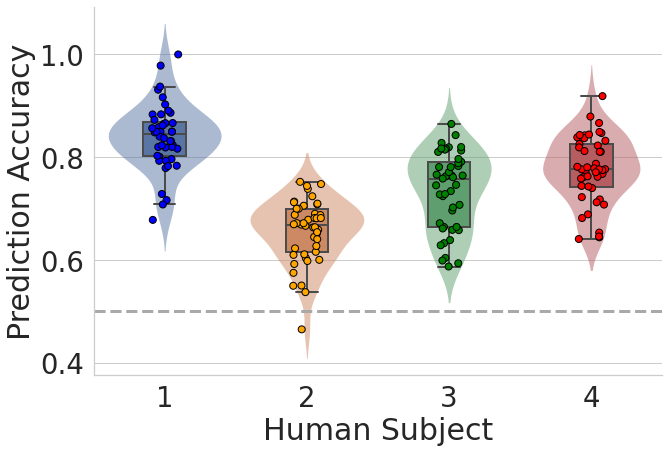

In [22]:
fig,ax=plt.subplots(figsize=(10,7))
sns.set(font_scale=2.5, style='whitegrid')
# sns.set(font_scale=2, style='whitegrid')

sub_cols = ['blue', 'orange',  'green','red']


sns.stripplot(x="subj_anon", y="accs", data=acc_df, ax=ax,size=7,edgecolor="black", linewidth=1, palette=sub_cols)
sns.violinplot(x="subj_anon", y="accs", 
               data=acc_df, inner="quartile", ax=ax, linewidth=0)
plt.setp(ax.collections[4:], alpha=.5)
sns.boxplot(x="subj_anon", y="accs", data=acc_df, width=0.3, boxprops={'zorder': 2}, 
            linewidth=2, fliersize=0)
ax.set_xlabel("Human Subject")
ax.set_ylabel("Prediction Accuracy")
ax.tick_params()
sns.despine()

plt.axhline(0.5, linewidth=3, linestyle='--', color='darkgray')
plt.tight_layout()
plt.savefig('/home/zetetic/Desktop/human_balanced_acc.png',dpi=300)
# plt.savefig('/home/zetetic/Desktop/prediction_acc/human_balanced_acc.pdf', dpi=300)